## Challenge Set 6  
Linear Learning  
Malik Salam  
01/22  

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set()
%matplotlib inline

### Challenge 1

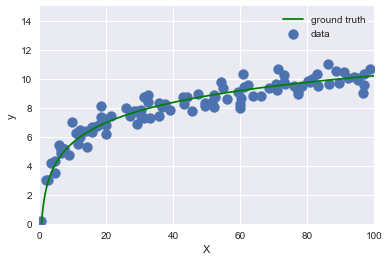

In [96]:
# create the data genrating model
np.random.seed(42)

def f(x):
    return 1 + 2 * np.log(x)

x_plot = np.linspace(0.01, 100, 1000)
n_samples = 100
X = np.random.uniform(0.01, 100, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale = .6, size=n_samples)[:, np.newaxis]

fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((0, 15))
ax.set_xlim((0, 100))
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend();

In [97]:
# fitting quadratic model using make pipeline
degree = 2
lr_quad = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lr_quad.fit(X, y)
lr_quad.score(X, y)

0.85132094768684796

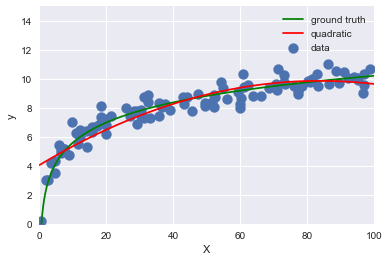

In [98]:
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.plot(x_plot, lr_quad.predict(x_plot[:, np.newaxis]), color='red', label='quadratic')
ax.set_ylim((0, 15))
ax.set_xlim((0, 100))
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend();

In [99]:
# fitting quadratic model from scratch
X2 = pd.DataFrame(X)
X2['sq']= np.square(X2.iloc[:,0])
lr_quad2 = LinearRegression()
lr_quad2.fit(X2, y)
lr_quad2.score(X2, y)

0.85132094768684796

In [100]:
# fitting log model
X_log = np.log(X)
lr_log = LinearRegression()
lr_log.fit(X_log, y)
lr_log.score(X_log, y)

0.92731292173277668

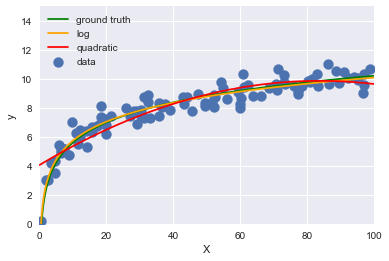

In [101]:
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.plot(x_plot, lr_log.predict(np.log(x_plot[:, np.newaxis])), color='orange', label='log')
ax.plot(x_plot, lr_quad.predict(x_plot[:, np.newaxis]), color='red', label='quadratic')
ax.set_ylim((0, 15))
ax.set_xlim((0, 100))
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend();

In [105]:
print("Intercept:",round(lr_log.intercept_[0],2), "\nCoefficient:", round(lr_log.coef_[0][0], 2))

Intercept: 1.39 
Coefficient: 1.89


## Challenge 2

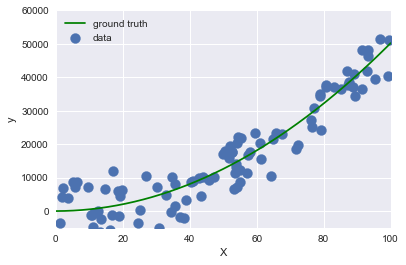

In [228]:
def g(x):
    return 1 + 2 * x + 5 * np.square(x)

x_plot = np.linspace(0.01, 100, 1000)
n_samples = 100
X = np.random.uniform(0.01, 100, size=n_samples)[:, np.newaxis]
y = g(X) + np.random.normal(scale = 5000, size=n_samples)[:, np.newaxis]

fig,ax = plt.subplots(1,1)
ax.plot(x_plot, g(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-5000, 60000))
ax.set_xlim((0, 100))
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend();

In [238]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)
# fitting quadratic model using make pipeline
degree = 2
lr_2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lr_2.fit(X_train, y_train)
print("Train MSE:", mean_squared_error(y_train, lr_2.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, lr_2.predict(X_test)))
print("Train R^2:", lr_2.score(X_train, y_train))
print("Test R^2:", lr_2.score(X_test, y_test))

Train MSE: 27376036.9867
Test MSE: 38934866.9527
Train R^2: 0.902897348728
Test R^2: 0.772480528374


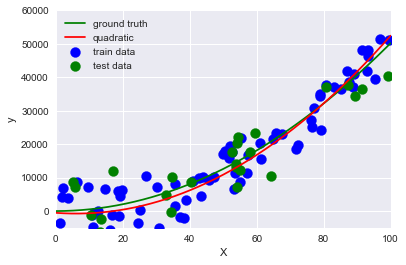

In [239]:
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, g(x_plot), label='ground truth', color='green')
ax.scatter(X_train, y_train, label='train data', s=100, c='b')
ax.scatter(X_test, y_test, label='test data', s=100, c='g')
ax.plot(x_plot, lr_2.predict(x_plot[:, np.newaxis]), color='red', label='quadratic')
ax.set_ylim((-5000, 60000))
ax.set_xlim((0, 100))
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend();

## Challenge 3

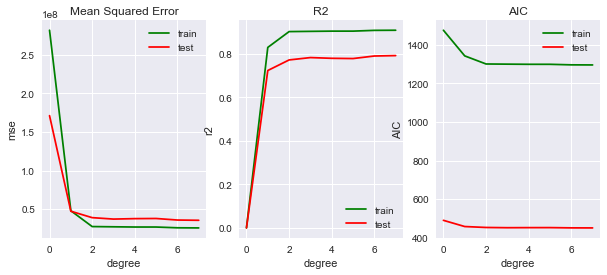

In [246]:
degrees = 8
train_mse = np.empty(degrees)
test_mse = np.empty(degrees)
train_r2 = np.empty(degrees)
test_r2 = np.empty(degrees)
train_aic = np.empty(degrees)
test_aic = np.empty(degrees)

for degree in range(degrees):
    lr_3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    lr_3.fit(X_train, y_train)
    
    train_mse[degree] = mean_squared_error(y_train, lr_3.predict(X_train))
    test_mse[degree] = mean_squared_error(y_test, lr_3.predict(X_test))
    
    train_r2[degree] = lr_3.score(X_train, y_train)
    test_r2[degree] = lr_3.score(X_test, y_test)
  
    train_aic[degree] = len(X_train)*np.log(mean_squared_error(y_train, lr_3.predict(X_train))) + 2 * degrees
    test_aic[degree] = len(X_test)*np.log(mean_squared_error(y_test, lr_3.predict(X_test))) + 2 * degrees

#plot
fig,ax = plt.subplots(1,3, figsize=(10, 4))
ax[0].plot(np.arange(degrees), train_mse, color='green', label='train')
ax[0].plot(np.arange(degrees), test_mse, color='red', label='test')
ax[0].set_ylabel('mse')
ax[0].set_xlabel('degree')
ax[0].set_title('Mean Squared Error')
ax[0].legend(loc='best')

ax[1].plot(np.arange(degrees), train_r2, color='green', label='train')
ax[1].plot(np.arange(degrees), test_r2, color='red', label='test')
ax[1].set_ylabel('r2')
ax[1].set_xlabel('degree')
ax[1].set_title('R2')
ax[1].legend(loc='best');

ax[2].plot(np.arange(degrees), train_aic, color='green', label='train')
ax[2].plot(np.arange(degrees), test_aic, color='red', label='test')
ax[2].set_ylabel('AIC')
ax[2].set_xlabel('degree')
ax[2].set_title('AIC')
ax[2].legend(loc='best');

## Challenge 4

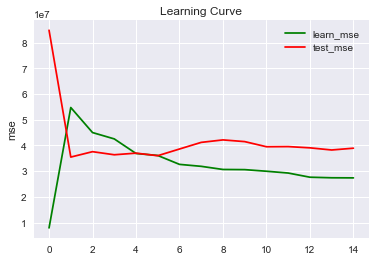

In [241]:
learn_mse = []
test_mse2 = []
for m in range(5, len(X_train) + 1 ,5):
    X_learn = X_train[:m]
    y_learn = y_train[:m]
    lr_4 = make_pipeline(PolynomialFeatures(2), LinearRegression())
    lr_4.fit(X_learn, y_learn)
    learn_mse.append(mean_squared_error(y_learn, lr_4.predict(X_learn)))
    test_mse2.append(mean_squared_error(y_test, lr_4.predict(X_test)))

fig,ax = plt.subplots(1,1)
ax.plot(np.arange(len(learn_mse)), learn_mse, label='learn_mse', color='green')
ax.plot(np.arange(len(test_mse2)), test_mse2, label='test_mse', color='red')
ax.set_ylabel('mse')
ax.legend()
ax.set_title('Learning Curve');